In [1]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import sklearn

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('x_train, y_train shape : ', x_train.shape, y_train.shape)
print('x_test, y_test shape : ', x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train, y_train shape :  (60000, 28, 28) (60000,)
x_test, y_test shape :  (10000, 28, 28) (10000,)


In [3]:
# For MLP we are going to flatten the image, and reshaping + normalization.
x_train_flatten = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2]).astype(np.float32) / 255.0
x_test_flatten = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2]).astype(np.float32) / 255.0

print('x_train_flatten shape : ', x_train_flatten.shape)
print('x_test_flatten shape : ', x_test_flatten.shape)
print('range of x_train : ', np.min(x_train_flatten), np.max(x_train_flatten))
print('range of x_test : ', np.min(x_train_flatten), np.max(x_train_flatten))

x_train_flatten shape :  (60000, 784)
x_test_flatten shape :  (10000, 784)
range of x_train :  0.0 1.0
range of x_test :  0.0 1.0


In [31]:
# Perform TTS
from sklearn.model_selection import train_test_split
x_train_flatten, x_val_flatten, y_train, y_val = train_test_split(x_train_flatten, y_train, test_size=0.30, random_state=42)

In [32]:
# Sequential API
seq_model = tf.keras.Sequential([
  tf.keras.Input(shape=(x_train_flatten.shape[1]), name='input'),
  tf.keras.layers.Dense(512, activation='relu', name='dense_1'),
  tf.keras.layers.Dense(256, activation='relu', name='dense_2'),
  tf.keras.layers.Dense(10, name='output')
])

print(seq_model.summary())

# Use from_logits=True when softmax layer is not being explicity set in the model's last layer.
# Use sparse categorical cross entropy if one hot encoding is not used.
# If one hot encoding is used, then use cross entropy.
seq_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 output (Dense)              (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [33]:
history = seq_model.fit(x_train_flatten, y_train, batch_size=32, epochs=5, validation_data=(x_val_flatten, y_val))

Epoch 1/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2141 - accuracy: 0.9355 - val_loss: 0.1341 - val_accuracy: 0.9586
Epoch 2/5
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0909 - accuracy: 0.9711 - val_loss: 0.1085 - val_accuracy: 0.9671
Epoch 3/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0593 - accuracy: 0.9810 - val_loss: 0.1042 - val_accuracy: 0.9701
Epoch 4/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0408 - accuracy: 0.9863 - val_loss: 0.1114 - val_accuracy: 0.9695
Epoch 5/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0969 - val_accuracy: 0.9754


In [34]:
seq_model.evaluate(x_test_flatten, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9760


[0.08664887398481369, 0.9760000109672546]

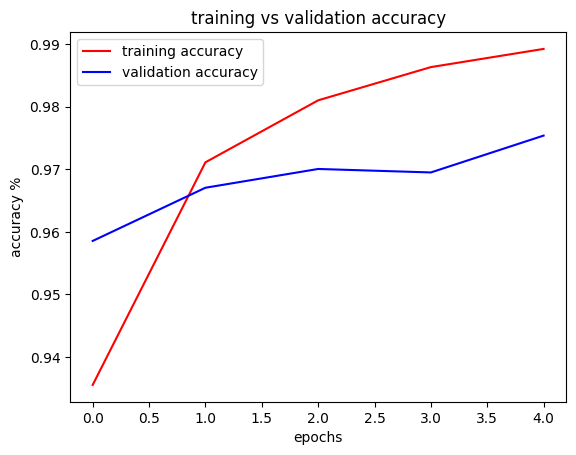

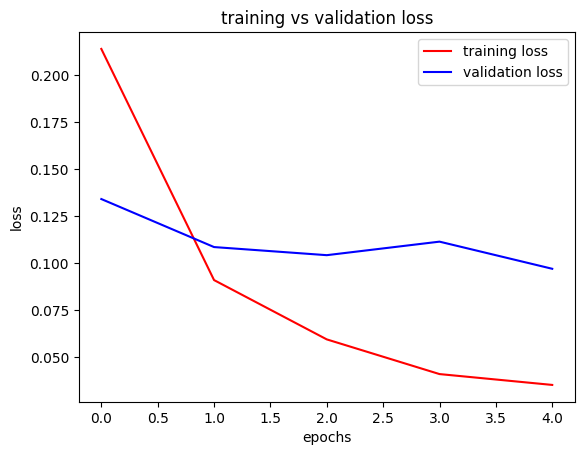

In [38]:
# Plotting the history.
history.history.keys()
plt.title('training vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy %')
plt.plot(range(0, len(history.history['accuracy'])), history.history['accuracy'], 'r', label='training accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], 'b', label='validation accuracy')
plt.legend()
plt.show()

history.history.keys()
plt.title('training vs validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(range(0, len(history.history['loss'])), history.history['loss'], 'r', label='training loss')
plt.plot(range(0, len(history.history['val_loss'])), history.history['val_loss'], 'b', label='validation loss')
plt.legend()
plt.show()


In [39]:
# Putting all the stuff inside a function, so the model and the input data is passed as parameter.
def train_eval_plot_model(model, x_train, x_test, x_val, y_train, y_test, y_val):
  history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))
  print('model evaluation : ', model.evaluate(x_test, y_test, batch_size=32))

  # Plotting the history.
  history.history.keys()
  plt.title('training vs validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy %')
  plt.plot(range(0, len(history.history['accuracy'])), history.history['accuracy'], 'r', label='training accuracy')
  plt.plot(range(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], 'b', label='validation accuracy')
  plt.legend()
  plt.show()

  history.history.keys()
  plt.title('training vs validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.plot(range(0, len(history.history['loss'])), history.history['loss'], 'r', label='training loss')
  plt.plot(range(0, len(history.history['val_loss'])), history.history['val_loss'], 'b', label='validation loss')
  plt.legend()
  plt.show()

In [44]:
# Using the functional API.
input = tf.keras.Input(shape=(x_train_flatten.shape[1]), name='input')
x = tf.keras.layers.Dense(512, activation='relu', name='dense_1')(input)
x = tf.keras.layers.Dense(256, activation='relu', name='dense_2')(x)
output = tf.keras.layers.Dense(10, activation='softmax', name='output')(x)

func_seq_model = tf.keras.Model(inputs=input, outputs=output)
func_seq_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 output (Dense)              (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Compile.
func_seq_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

Epoch 1/5
1313/1313 [==============================] - 17s 12ms/step - loss: 0.2169 - accuracy: 0.9333 - val_loss: 0.1294 - val_accuracy: 0.9612
Epoch 2/5
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0908 - accuracy: 0.9715 - val_loss: 0.1148 - val_accuracy: 0.9647
Epoch 3/5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0946 - val_accuracy: 0.9719
Epoch 4/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.1088 - val_accuracy: 0.9709
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9747
model evaluation :  [0.09624746441841125, 0.9746999740600586]


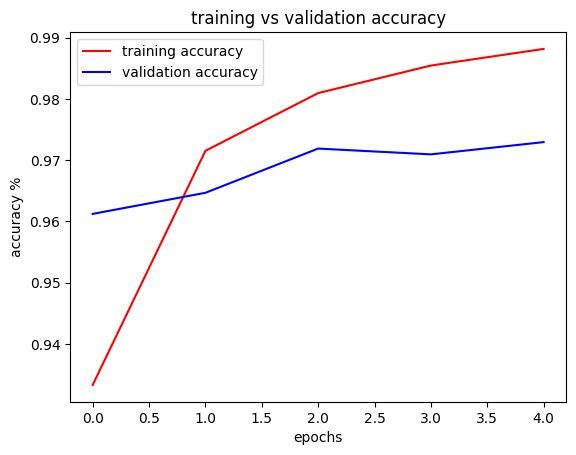

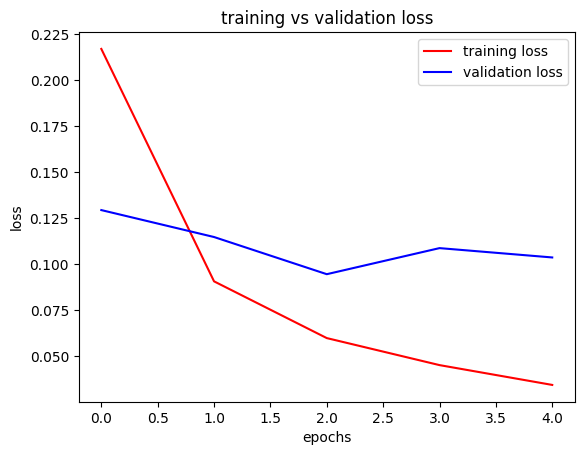

In [47]:
train_eval_plot_model(func_seq_model, x_train_flatten, x_test_flatten, x_val_flatten, y_train, y_test, y_val)